# **Data Analysis for FAANG Securities**
---

### Import Libraries

In [49]:
import os
import warnings
import operator 

import datetime as dt

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 

from importlib import reload

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 180

### Retrieve Data

In [50]:
#ticker = 'FB'
#ticker = 'AAPL'
#ticker = 'AMZN'
#ticker = 'NFLX'
ticker = 'GOOG'

In [51]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)
print('List of stocks: ', end = ' ')
for i in stocks.keys():
    print(i.upper(), end=' ')

List of stocks:  AMZN FB NFLX GOOG AAPL 

In [52]:
stocks[ticker.lower()].tail()

,High,Low,Open,Close,Volume,Adj Close,Return,Change,Volatility,MA7,MA21,Momentum,RSI,MACD,Signal,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,
2022-04-26,2455.000000,2383.237061,2455.000000,2390.120117,2469700.0,2390.120117,-0.026,-74.879883,146.136424,2497.271449,2657.434291,2495.750000,33.469284,-77.550379,-47.486481,2972.085365,2342.783217
2022-04-27,2350.000000,2262.485107,2287.459961,2300.409912,3111900.0,2300.409912,0.006,-89.710205,160.985071,2460.298584,2631.787144,2389.280029,29.606223,-90.655783,-56.120341,2971.113976,2292.460313
2022-04-28,2408.770020,2302.877930,2342.300049,2388.229980,1839500.0,2388.229980,0.020,87.820068,165.808529,2428.528564,2609.083810,2462.000000,37.242589,-92.884846,-63.473242,2946.669675,2271.497945
2022-04-29,2379.199951,2293.879883,2351.560059,2299.330078,1683500.0,2299.330078,-0.022,-88.899902,176.013484,2390.588588,2582.723819,2387.120117,33.303997,-100.664477,-70.911489,2926.739870,2238.707768
2022-05-02,2341.699951,2267.989990,2278.129883,2332.320068,1165587.0,2332.320068,0.024,32.989990,181.725584,2366.812884,2560.787156,2297.409912,36.008509,-102.980775,-77.325346,2907.231908,2214.342404


---
# Check for Correlation
---

In [53]:
stocks[ticker.lower()].corr()[['Return']].sort_values(by='Return', ascending=False)[:5]

,Return
Return,1.000000
Change,0.517430
RSI,0.265561
MACD,0.029180
Close,0.018158


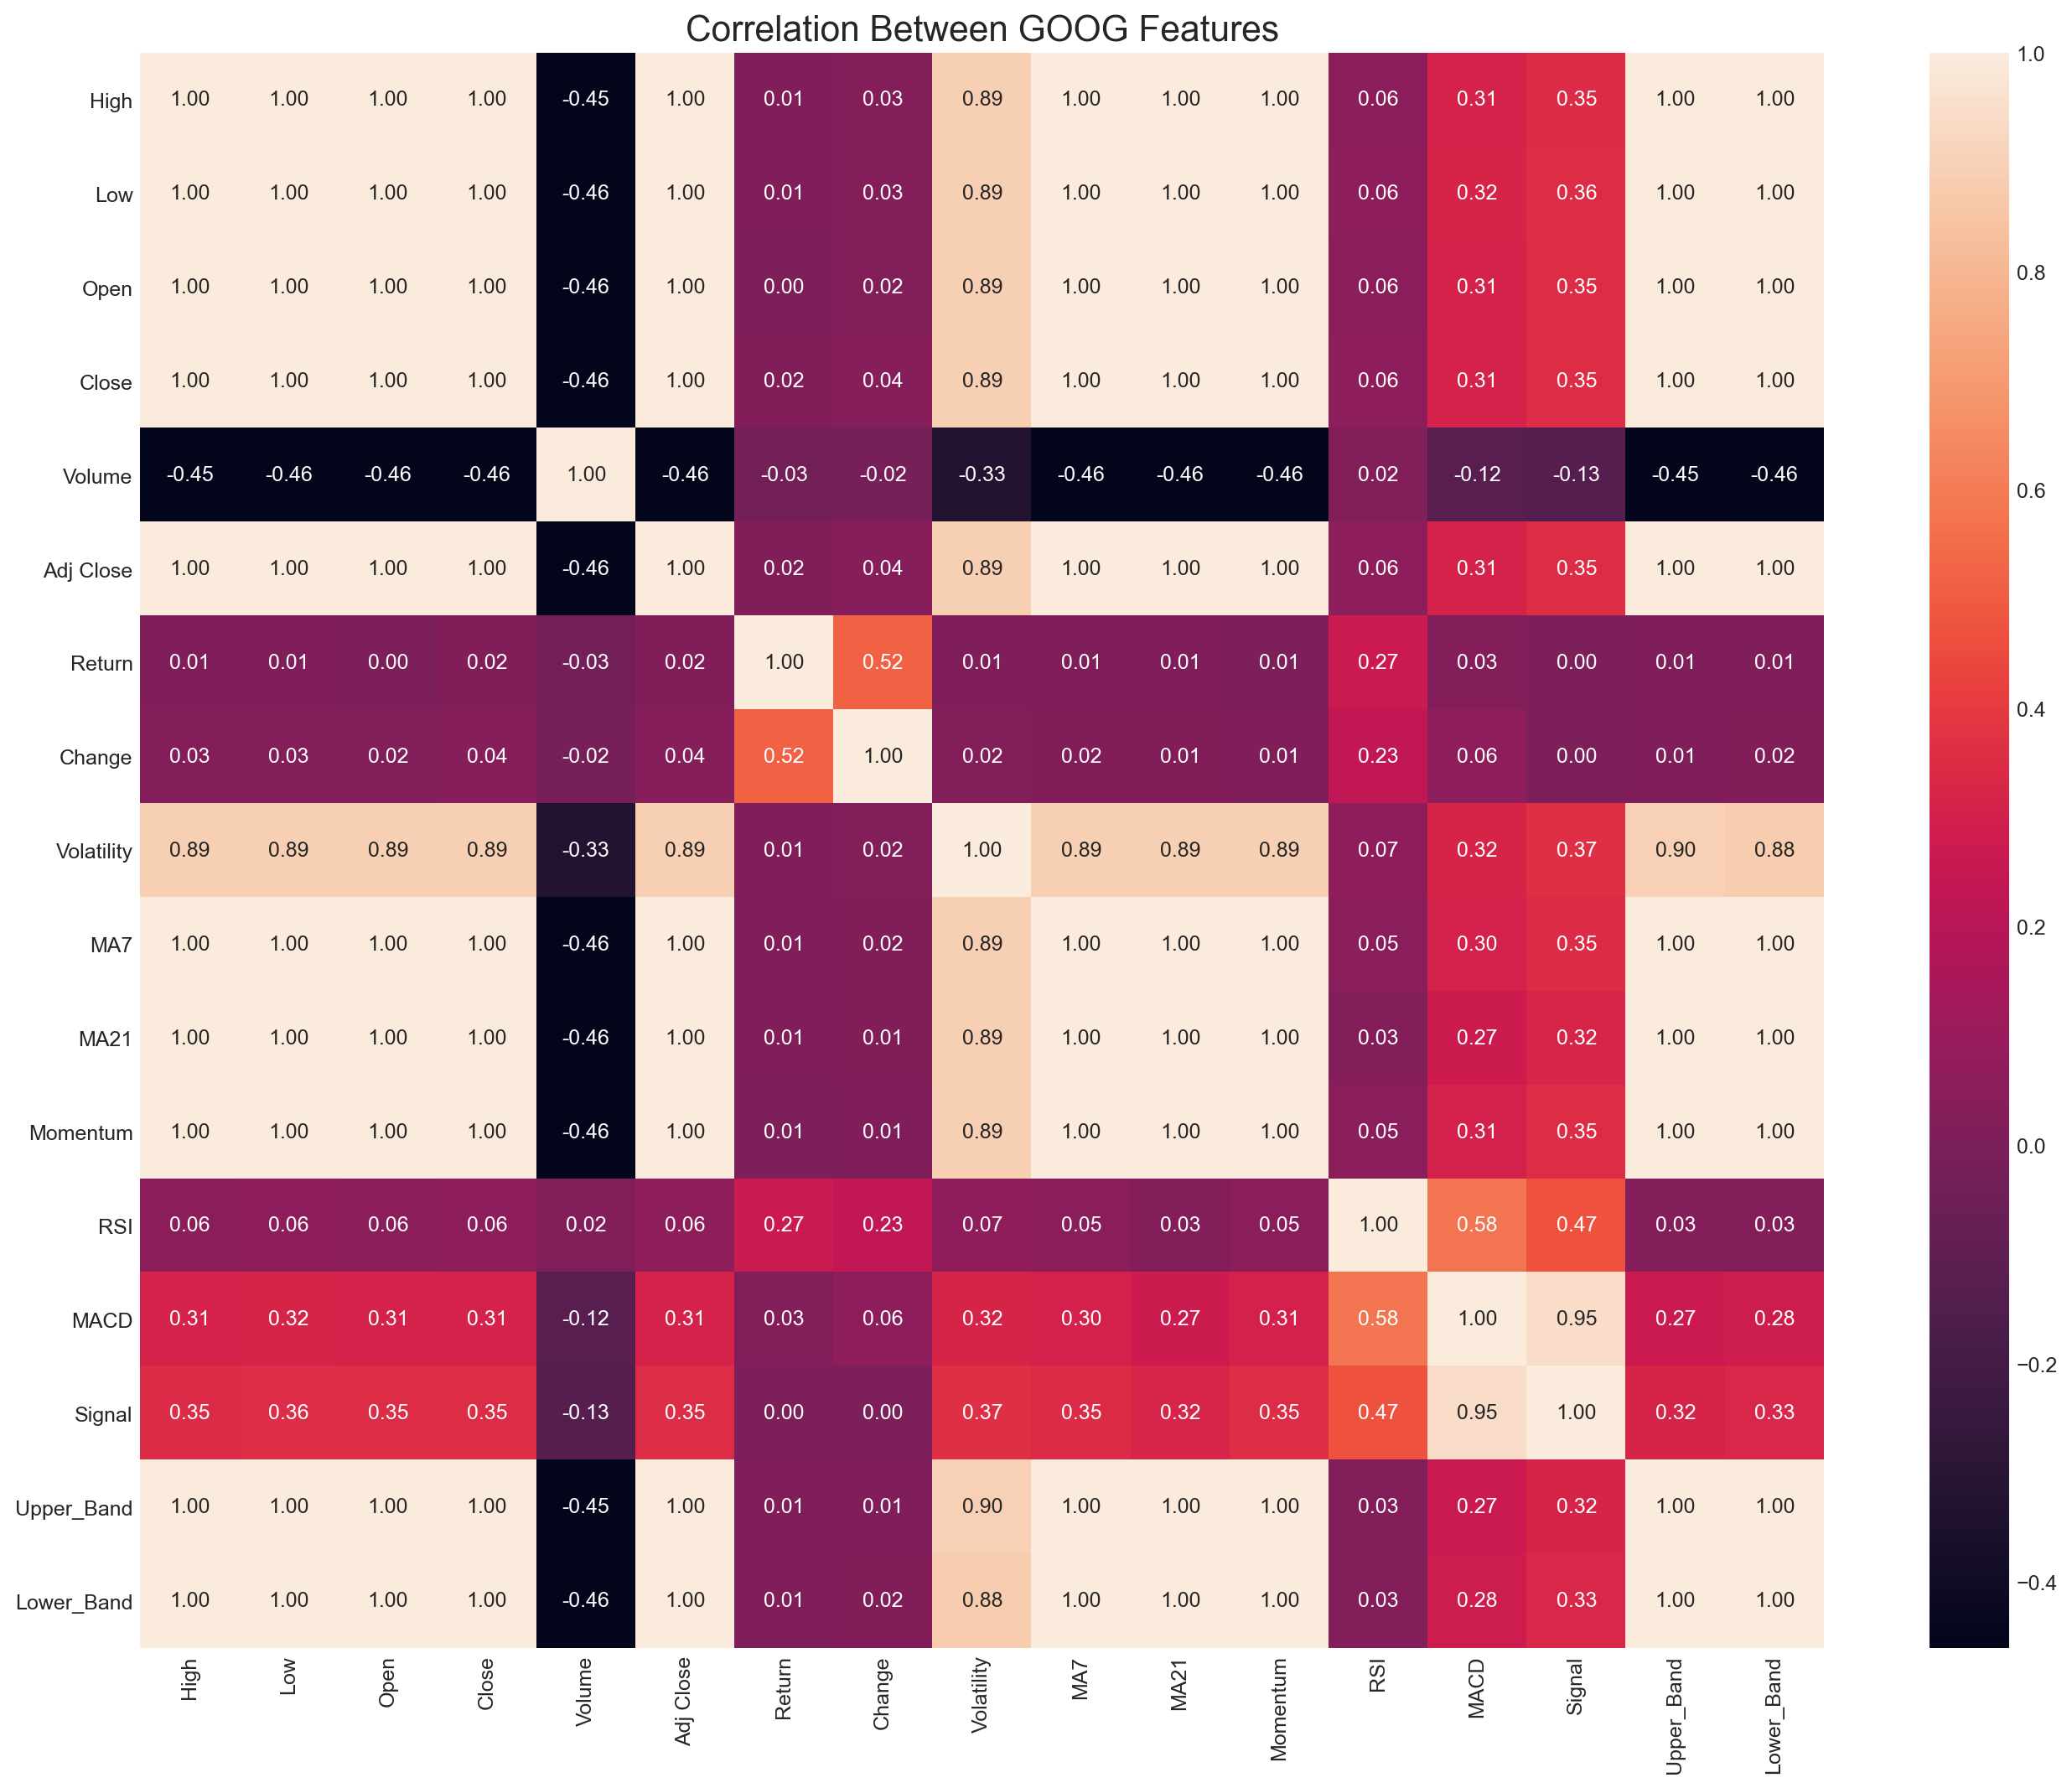

In [54]:
plt.figure(figsize=(18,14))
sns.heatmap(stocks[ticker.lower()].corr(), annot=True, fmt='.2f')
plt.ylim(17,0)
plt.title('Correlation Between '+ticker.upper()+' Features', fontSize=17)
plt.show();

---
# Bollinger Bands
---

In [55]:
Blue = '#3388cf'
Purple = '#ad6eff'
Red = '#ff6e9d'
Green = '#60e8ad'
Dark_Green = '#ffa74a'
Dark_Orange = '#ffbd74'
Light_Orange = '#ffa33f'
Fill_Orange = '#ffa33f'

In [56]:
std = 2
xend = dt.date(2020,12,31)
xstart = dt.date(2020,1,1)

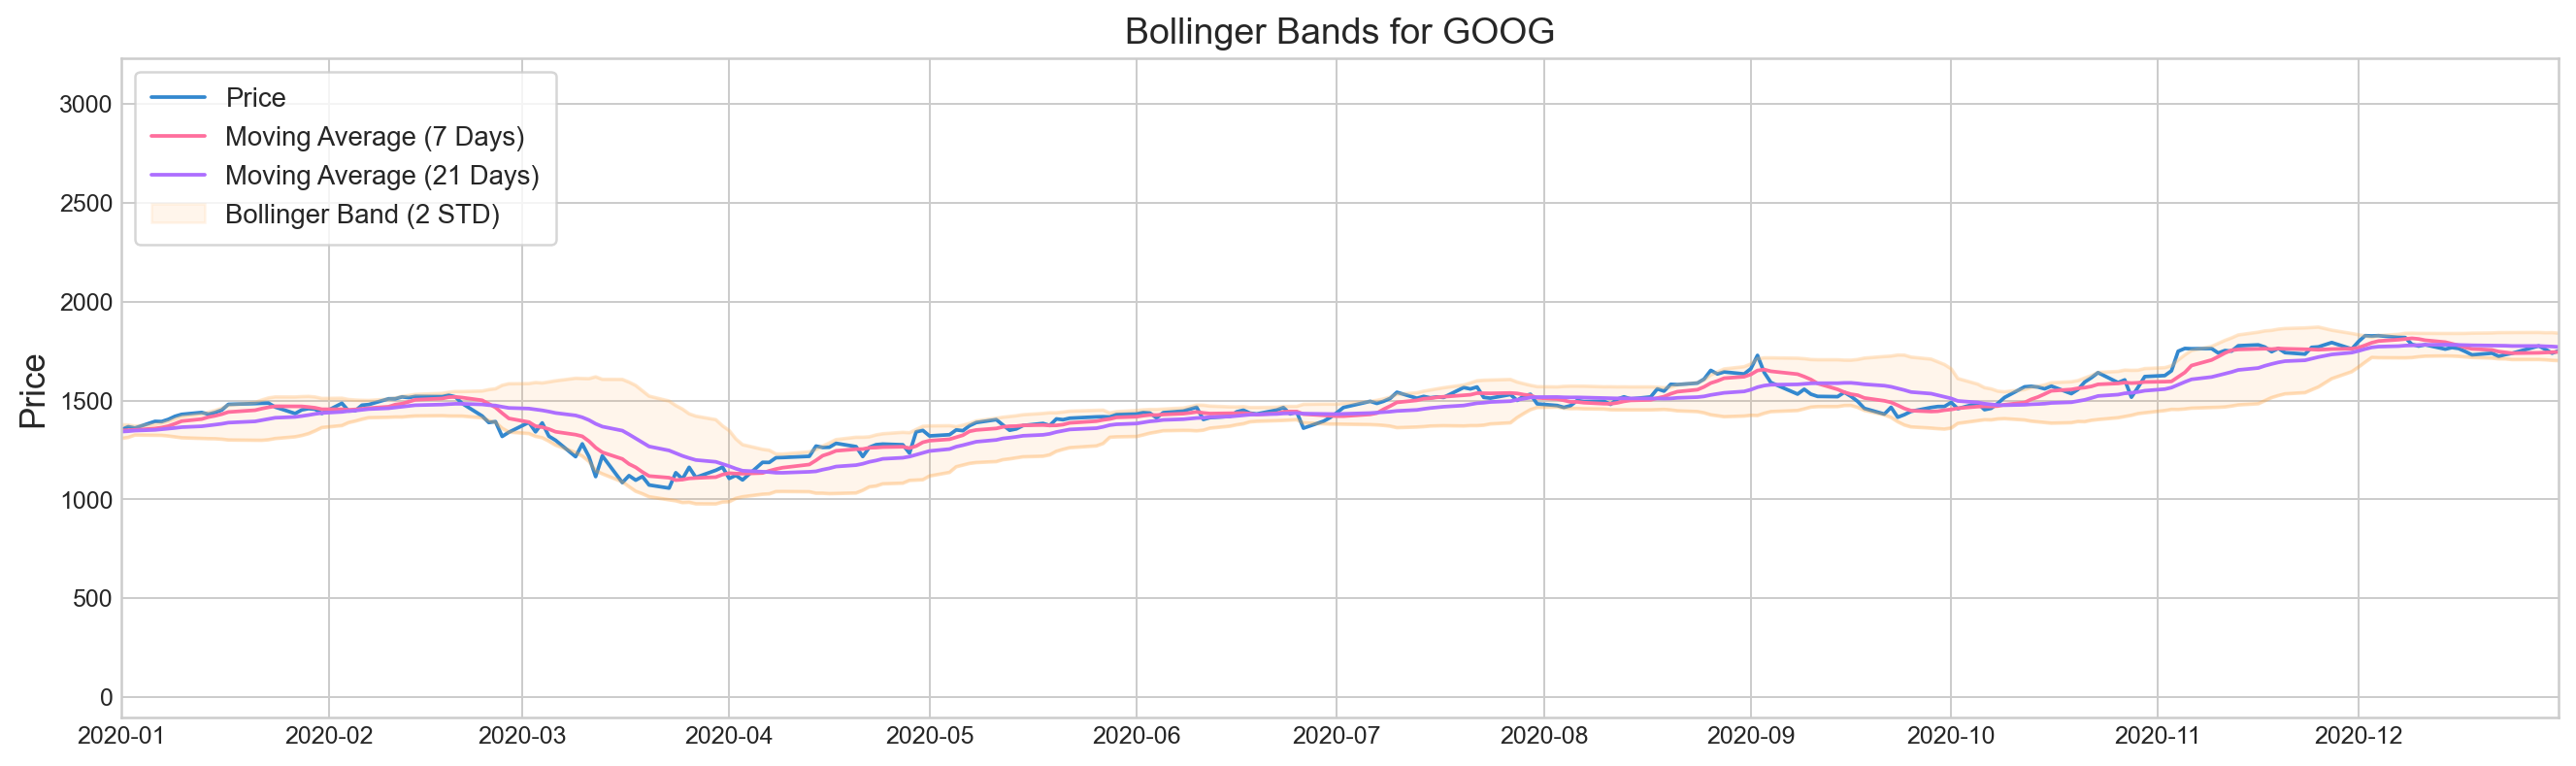

In [57]:
plt.figure(figsize=(18,5))
plt.style.use('seaborn-whitegrid')

plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].Close, color=Blue, label = 'Price')
plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].MA7, color=Red, label = 'Moving Average (7 Days)')
plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].MA21, color=Purple, label = 'Moving Average (21 Days)')

plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].Upper_Band, color=Dark_Orange, alpha=0.3)
plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].Lower_Band, color=Light_Orange, alpha=0.3)
plt.fill_between(stocks[ticker.lower()].index, stocks[ticker.lower()].Upper_Band, stocks[ticker.lower()].Lower_Band, color=Light_Orange, alpha=0.1, label='Bollinger Band ({} STD)'.format(std))

plt.legend(frameon=True,loc=2, ncol=1, fontsize=11, borderpad=.6)
plt.title('Bollinger Bands for '+ticker.upper(), fontsize=15)
plt.ylabel('Price', fontsize=14)
plt.xlim([xstart,xend])
plt.show();

---
# Relative Strength Index (RSI)
---

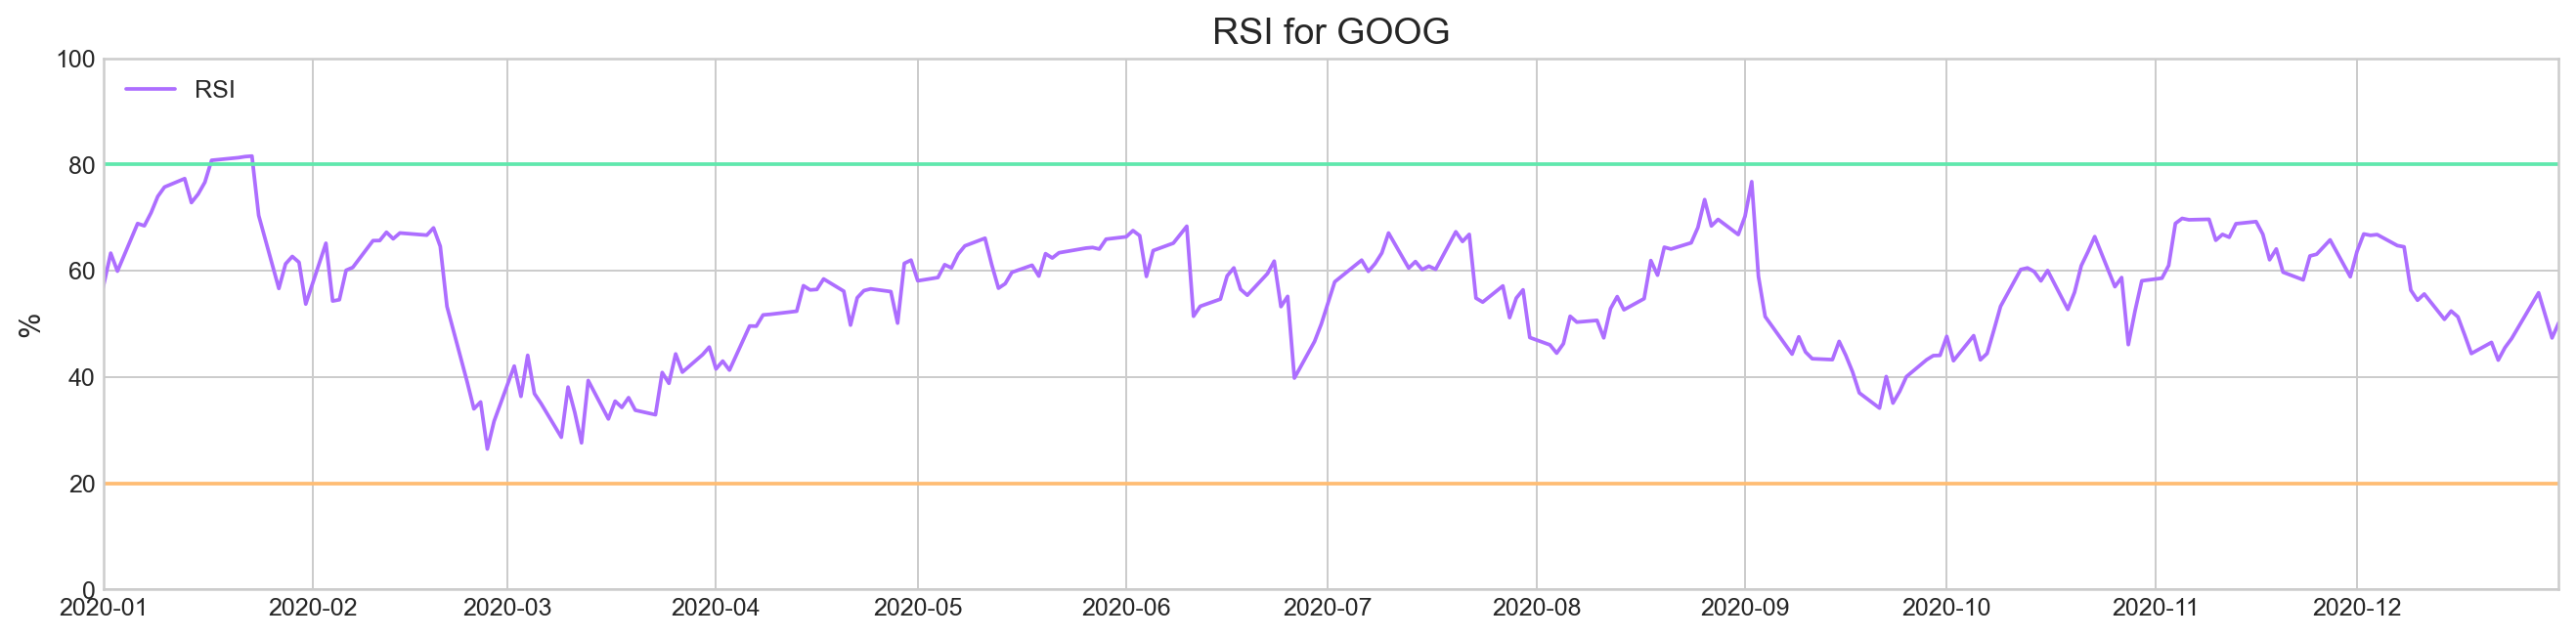

In [58]:
plt.figure(figsize=(18,4))

plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].RSI, color=Purple, label='RSI')

plt.xlim([xstart,xend])
plt.ylim([0,100])
plt.axhline(20, color=Dark_Orange)
plt.axhline(80, color=Green)

plt.legend(loc=2)
plt.title('RSI for '+ticker.upper(),fontsize=15)
plt.ylabel('%', fontsize=12)
plt.show();

---
# Moving Average Convergence/Divergence (MACD)
---

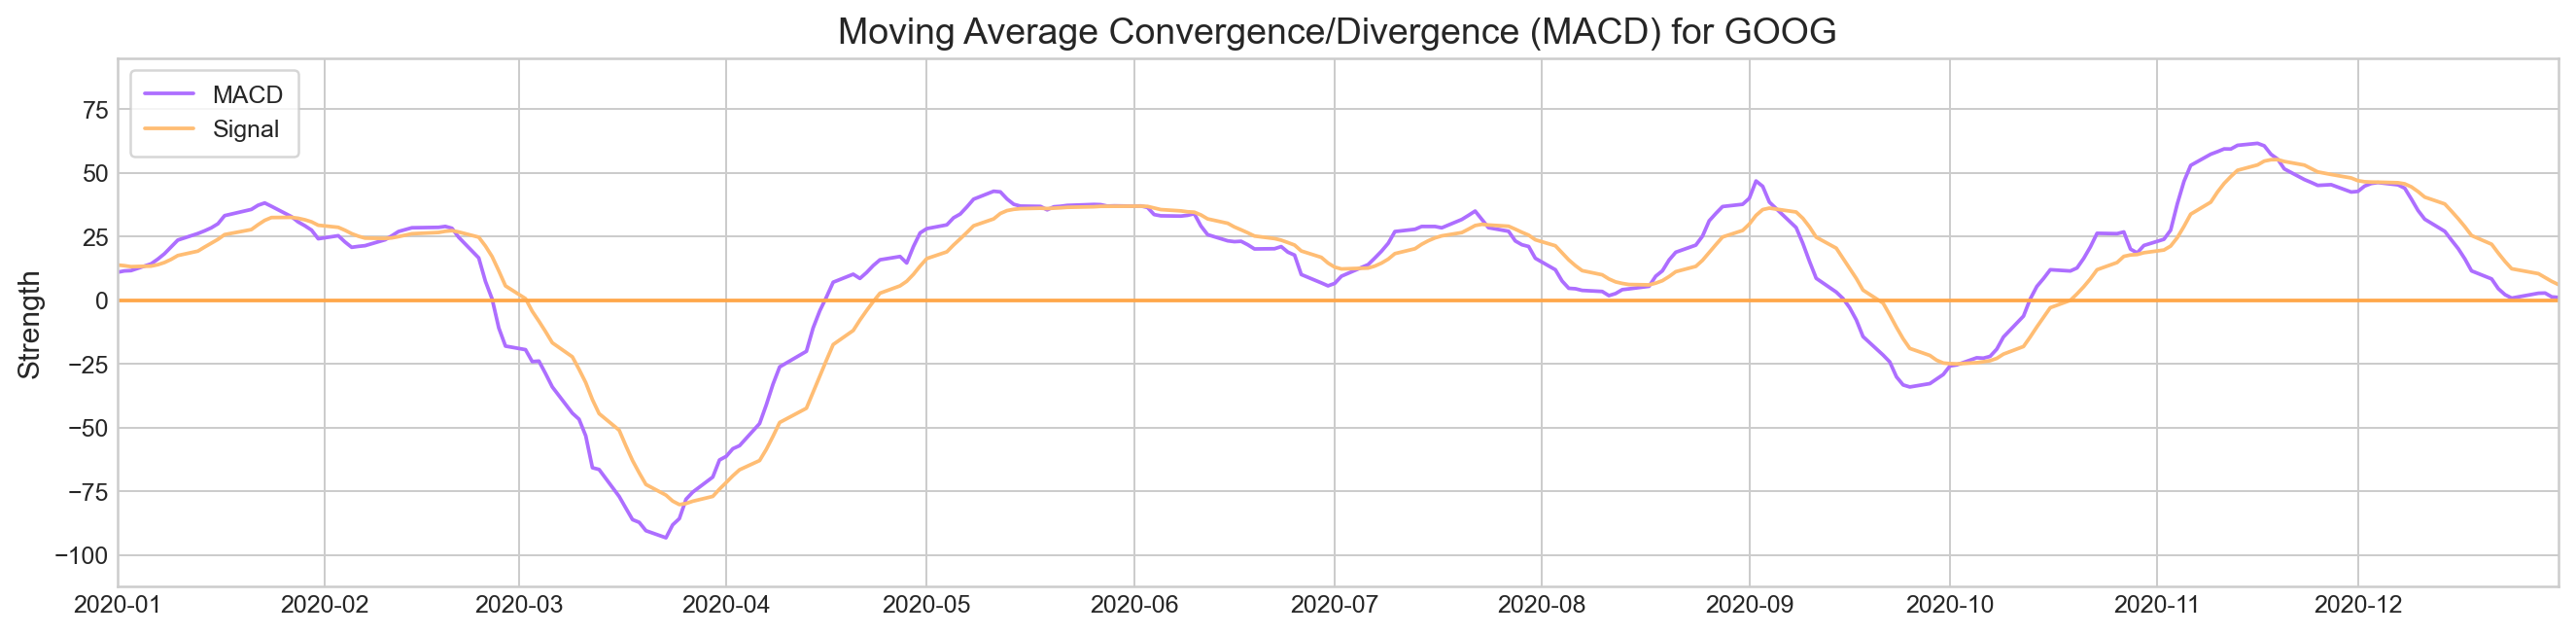

In [59]:
plt.figure(figsize=(18,4))

plt.plot(stocks[ticker.lower()].MACD, label="MACD", color=Purple)
plt.plot(stocks[ticker.lower()].Signal, label="Signal", color=Dark_Orange)

plt.axhline(0, color=Dark_Green)
plt.xlim([xstart,xend])

plt.legend(frameon=True, loc=2, ncol=1, fontsize=10, borderpad=.6)
plt.ylabel('Strength', fontsize=12)
plt.title("Moving Average Convergence/Divergence (MACD) for "+ticker.upper(), fontsize=15)
plt.show();

---
# Volume
---

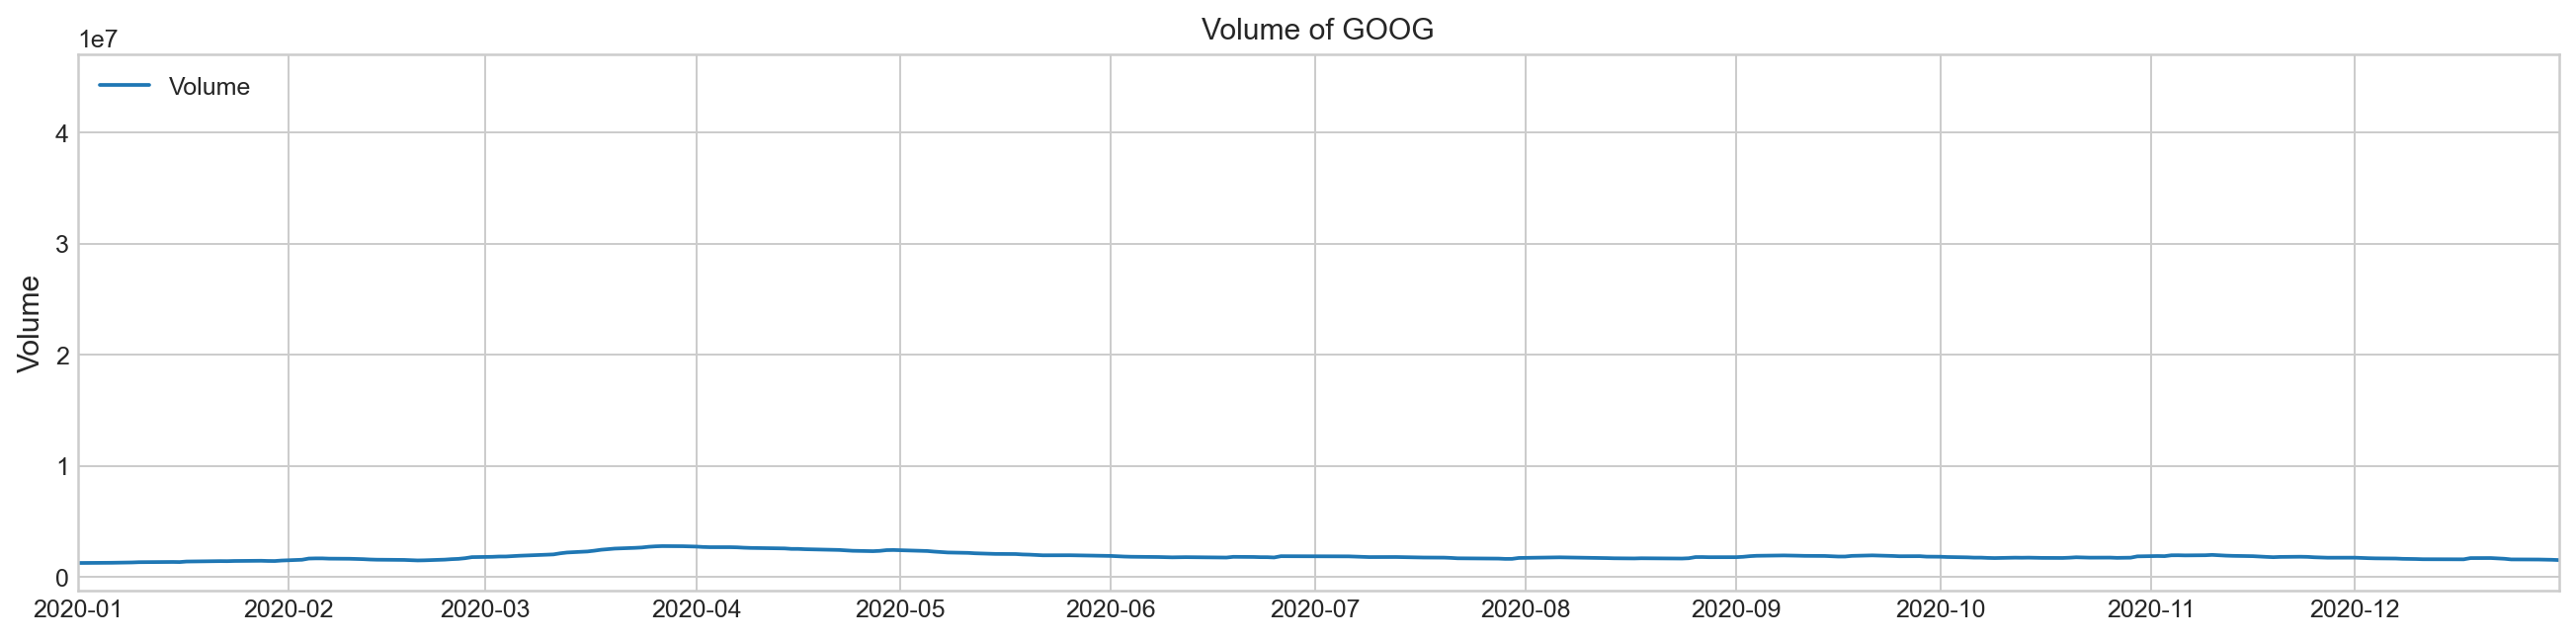

In [60]:
plt.figure(figsize=(18,4))
plt.style.use('seaborn-whitegrid')

plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()]['Volume'].ewm(21).mean(), label="Volume")

plt.xlim([xstart,xend])

plt.legend(loc=2)
plt.ylabel('Volume', fontsize=12)
plt.title("Volume of "+ticker.upper())
plt.show();